In [ ]:
#| hide
import os
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from HierarchicalGeoClustering.TreeClusters import *
from HierarchicalGeoClustering.Clustering import *


# Tutorial

In this tutorial an example on how to use the most important methods of the library are inroduce. 

## Generation of clusters

To create a clusters tree we use the `TreeClusters` class, the class cunstructor only creates a empty structure, none of the node has any values. 

In [ ]:
HGC = TreeClusters(4, random_seed= 124)

In [ ]:
HGC.print_structure()

Root
Root    
├── Root_l_0_n_0
│   ├── Root_l_0_n_0_l_1_n_0
│   │   └── Root_l_0_n_0_l_1_n_0_l_2_n_0
│   │       ├── Root_l_0_n_0_l_1_n_0_l_2_n_0_l_3_n_0
│   │       └── Root_l_0_n_0_l_1_n_0_l_2_n_0_l_3_n_1
│   ├── Root_l_0_n_0_l_1_n_1
│   ├── Root_l_0_n_0_l_1_n_2
│   │   ├── Root_l_0_n_0_l_1_n_2_l_2_n_0
│   │   ├── Root_l_0_n_0_l_1_n_2_l_2_n_1
│   │   │   ├── Root_l_0_n_0_l_1_n_2_l_2_n_1_l_3_n_0
│   │   │   └── Root_l_0_n_0_l_1_n_2_l_2_n_1_l_3_n_1
│   │   └── Root_l_0_n_0_l_1_n_2_l_2_n_2
│   │       └── Root_l_0_n_0_l_1_n_2_l_2_n_2_l_3_n_0
│   └── Root_l_0_n_0_l_1_n_3
│       ├── Root_l_0_n_0_l_1_n_3_l_2_n_0
│       │   ├── Root_l_0_n_0_l_1_n_3_l_2_n_0_l_3_n_0
│       │   ├── Root_l_0_n_0_l_1_n_3_l_2_n_0_l_3_n_1
│       │   └── Root_l_0_n_0_l_1_n_3_l_2_n_0_l_3_n_2
│       └── Root_l_0_n_0_l_1_n_3_l_2_n_1
│           ├── Root_l_0_n_0_l_1_n_3_l_2_n_1_l_3_n_0
│           └── Root_l_0_n_0_l_1_n_3_l_2_n_1_l_3_n_1
└── Root_l_0_n_1


We can access to the root node to see that it has no point inside

In [ ]:
HGC.root.get_points()==None

True


To populate the structure and its values the method `populate_tree` is called, this method populates each node in the tree generating the polygon and creates $n$ (200) random point inside of them. 

The `avoid_intersec` flag is used if we want to avoid the intersection between the cluster node at the same level.


In [ ]:
#slow
HGC.populate_tree(number_per_cluster=200, avoid_intersec= True)

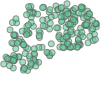

In [ ]:

HGC.root.get_points()

## Visualization


We can use the vizualization methods implemented on the `NodeCluster` class or in the `TreeClusters` class, deppending on what is needed 

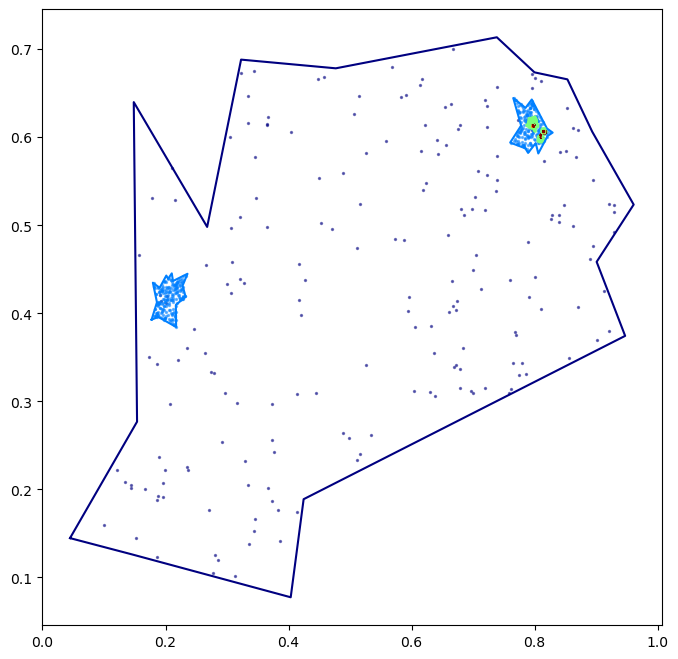

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
HGC.visualize(axs, polygon=True)

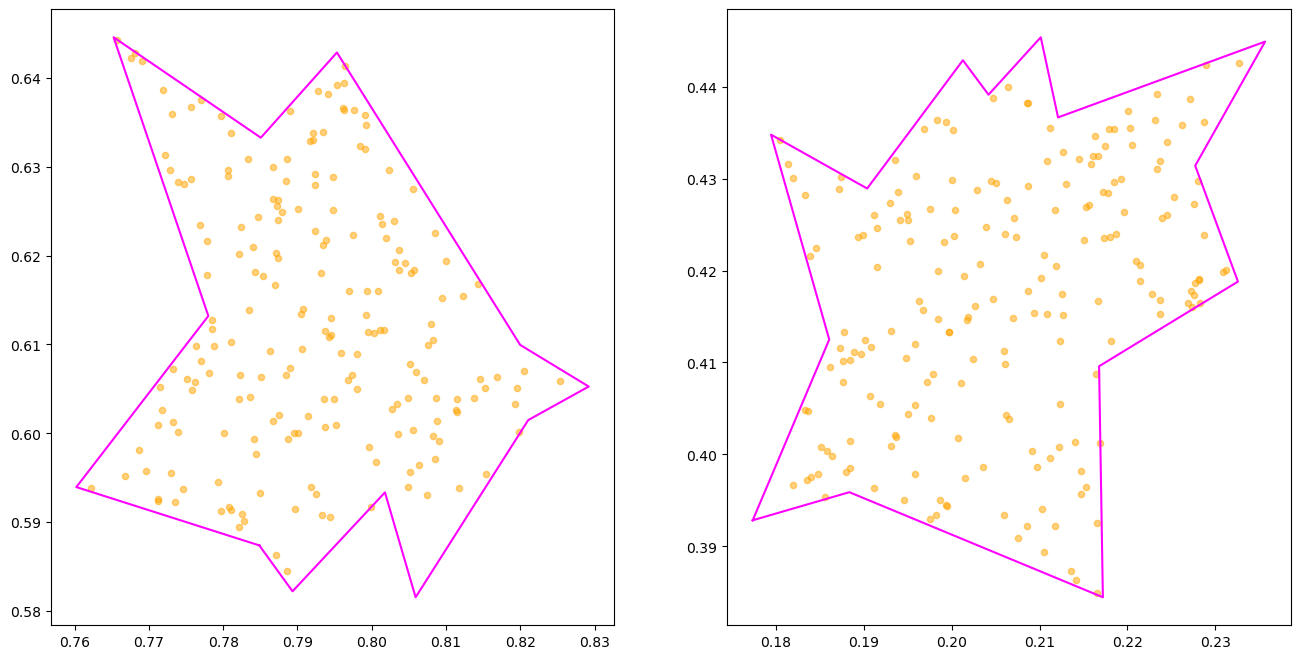

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,8))
for num, node in enumerate(HGC.get_level(1)) : 
    node.viewer_cluster(axs[num], polygon=True,size_cluster= 20 )

To visualize the children in a specific node 

<AxesSubplot:>

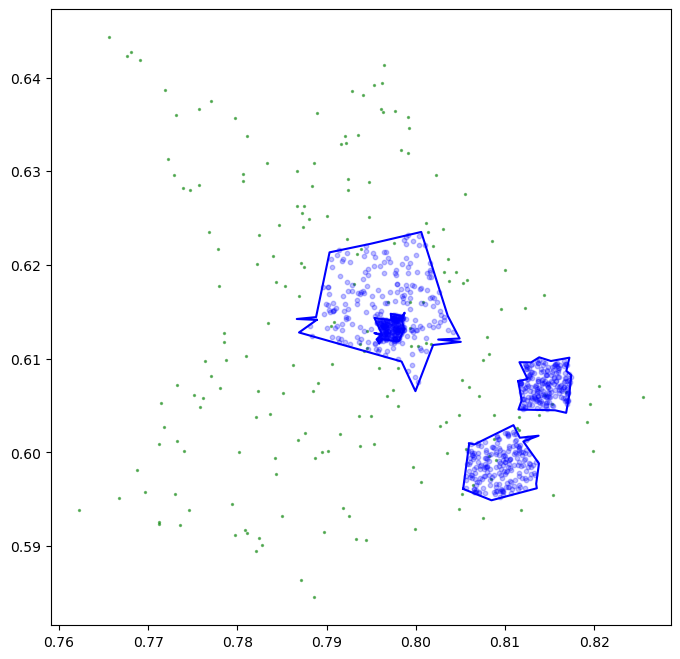

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
HGC.get_level(1)[0].viewer_cluster(axs,
                                   #size_cluster= 20,
                                   level= 1,
                                   size_children=10,
                                   polygon_children= True)


We can visualize single cluster and the clusters that belong to it. 

<AxesSubplot:>

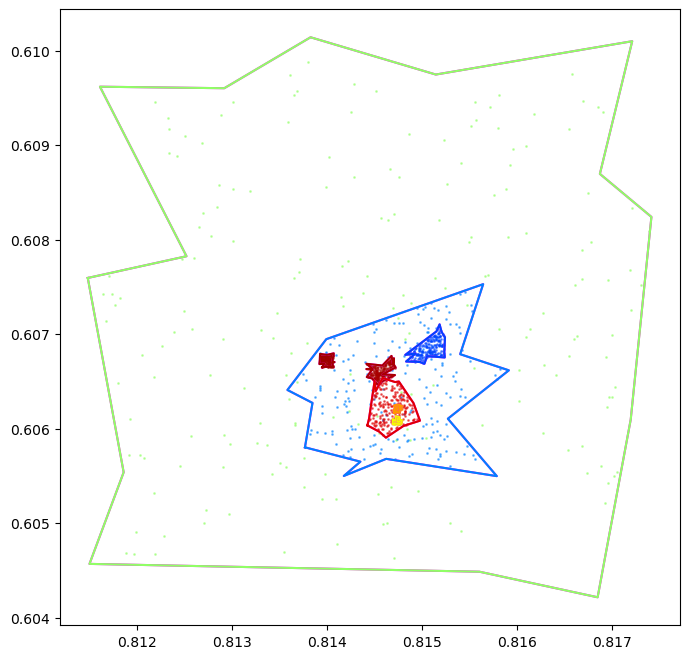

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
HGC.get_level(2)[3].viewer_cluster(axs, polygon=True, level=-1)

## Clusterization 

To clusterize the all the points are exctracted from the `TreeClusters` class and converted to a numpy array. To have only a single cluster node as a root these points are pass as a dictionary with no parent and pass as result of a clusterization. 

In [ ]:
original_points= HGC.get_points_tree()
X_2=np.array([[p.x,p.y] for p in original_points])
dic_points={'points':[X_2], 'parent':''}

The `recursive_clustering_tree` method is used to obtained a clusters tree, the result is a `TreeClusters` object the paremeters to pass will depend on the algorithm selected. Some default values are selected to obtain a basic result. 

In [ ]:
#slow
Natural_HGC = recursive_clustering_tree(
                        dic_points,
                        levels_clustering = 4,
                        algorithm = 'natural_cities'
                )


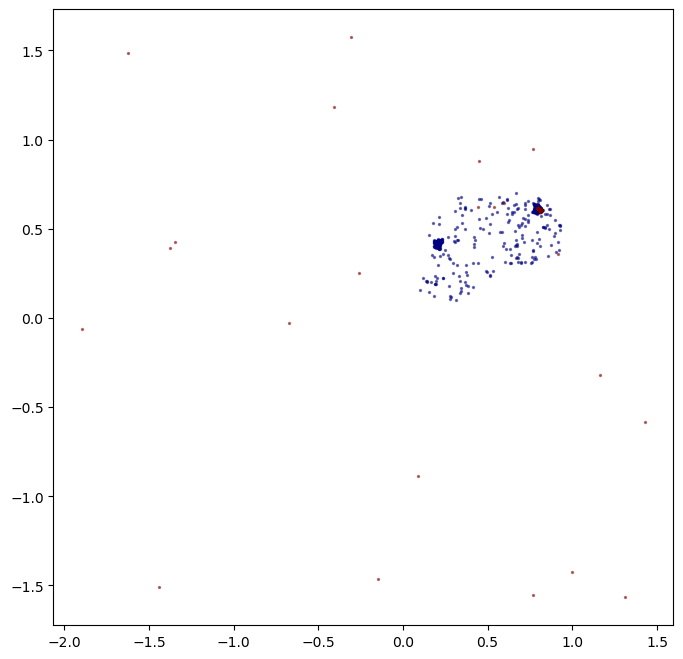

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
Natural_HGC.visualize_levels(axs, levels=[0,2])

In [ ]:
#slow
DBSCAN_HGC = recursive_clustering_tree(
                        dic_points,
                        levels_clustering = 4,
                        algorithm = 'dbscan'
                )

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Only a specific evel to visualize only the points

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
DBSCAN_HGC.visualize(axs,  polygon = True)


In [ ]:
#slow
HDBSCAN_HGC = recursive_clustering_tree(
                        dic_points,
                        levels_clustering = 4,
                        algorithm = 'hdbscan'
                )


In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
HDBSCAN_HGC.visualize(axs, polygon = True)

In [ ]:
#slow
OPTICS_HGC= recursive_clustering_tree(
                        dic_points,
                        levels_clustering = 4,
                        algorithm = 'optics'
                )


In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
OPTICS_HGC.visualize(axs, polygon = True)

In [ ]:
#| output: false
#slow
adaptative_DBSCAN_HGC = recursive_clustering_tree(
                    dic_points,
                    levels_clustering = 4,
                    algorithm = 'adaptative_DBSCAN'
                )

In [ ]:
fig, axs = plt.subplots( figsize=(8,8))
adaptative_DBSCAN_HGC.visualize(axs, polygon = True)

## Evaluation

To evaluate the clusterizations on a specific level $i$ using the $SSM$, the need for the shape of all the polygons on the level $i$ is needed. Therefore the evaluation is made using the nodes in the `TreeClusters` objects for the specific level to evaluate on the clusterizations to evaluate. 

$$
SSM(\mathcal{P}_i^O , \mathcal{Q}_i^{C}) =\frac{\sum\limits_{P_{l}^O\in \mathcal{P}_i^O  Q_{k}^C \in{Q}_i^{C} } | P_{l}^O\cap Q_{k}^C |* Jacc(P_{l}^O,Q_{k}^C)} {\sum\limits_{P \in \mathcal{P}_i^O} |P|  
+  \sum\limits_{Q \in \mathcal{Q}_{not}} |Q|} 
$$

In [ ]:
level=1 
SSM(HGC.levels_nodes[level],
    DBSCAN_HGC.levels_nodes[level]
   )

In [ ]:
SSM(HGC.levels_nodes[level],
    HDBSCAN_HGC.levels_nodes[level]
   )

In [ ]:
SSM(HGC.levels_nodes[level],
    adaptative_DBSCAN_HGC.levels_nodes[level]
   )

In [ ]:
level=3
SSM(HGC.levels_nodes[level],
    adaptative_DBSCAN_HGC.levels_nodes[level]
   )

### Obtain the tags

If the specific label for each point is needed for some other purpose, the `get_dataframe_recursive_node_label` method is available. The method obtains the tag for all the points and puts them into a dataframe.


In [ ]:
df_Natural_C = Natural_HGC.get_dataframe_recursive_node_label()
df_DBSCAN = DBSCAN_HGC.get_dataframe_recursive_node_label()
df_HDBSCAN = HDBSCAN_HGC.get_dataframe_recursive_node_label()
df_OPTICS = OPTICS_HGC.get_dataframe_recursive_node_label()
df_Ada_DBSCAN = adaptative_DBSCAN_HGC.get_dataframe_recursive_node_label()

In [ ]:
df_Natural_C.head()